# MLP 모델

In [ ]:
# MNIST 데이터
# 0 ~ 9까지로 이루어진 손글씨 숫자데이터

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
test_images.shape

(10000, 28, 28)

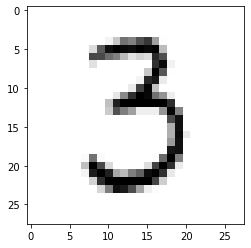

In [ ]:
# 데이터 하나만 출력
import matplotlib.pyplot as plt

# plt.imshow(train_images[100], cmap = 'gray') 배경이 검은색
plt.imshow(train_images[50], cmap = plt.cm.binary) # 배경이 하얀색
plt.show()

In [ ]:
train_labels[50]

3

In [ ]:
# Feature Engineering
# 이미지 데이터에서는 데이터 범위 수정(0~255 / 정수) > 0~1 / 실수
# 계산량 감소, 분산 감소
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [ ]:
# 이미지 데이터를 1차원으로 변경
# MLP에 학습하기 위해서
train_images = train_images.reshape(60000, 28*28)
test_images = test_images.reshape(10000, 28*28)

In [ ]:
# 원 핫 인코딩
from tensorflow.keras.utils import to_categorical

train_label_one = to_categorical(train_labels)
test_label_one = to_categorical(test_labels)

In [ ]:
train_images.shape, test_images.shape, train_label_one.shape, test_label_one.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

In [ ]:
# 딥러닝 모델 설계(MLP)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()
model1.add(Dense(units = 256, activation = 'relu', input_dim = 28*28))
model1.add(Dense(units = 10, activation = 'softmax'))

model1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 컴파일하기
model1.compile(loss = 'categorical_crossentropy',# 다중분류
               optimizer = 'Adam',
               metrics = ['accuracy'])

In [ ]:
# 모델 학습하기
model1.fit(train_images, train_label_one, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2249 - accuracy: 0.9347
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0915 - accuracy: 0.9727
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0608 - accuracy: 0.9816
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0422 - accuracy: 0.9866
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0318 - accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0245 - accuracy: 0.9920
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0186 - accuracy: 0.9940
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0155 - accuracy: 0.9949
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0123 - accuracy: 0.9961
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.012

In [ ]:
# 모델 평가하기
model1.evaluate(test_images,test_label_one)

313/313 [==============================] - 2s 5ms/step - loss: 0.0871 - accuracy: 0.9790


[0.08710604906082153, 0.9789999723434448]

In [ ]:
# 직접 그린 손글씨이미지 읽어오기
#/content/img5.png
import PIL.Image as plimg
import numpy as np

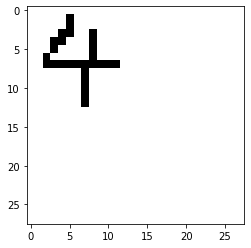

In [ ]:
gray_img = plimg.open('/content/img4.png').convert('L')
plt.imshow(gray_img,cmap = 'gray')
plt.show()

In [ ]:
img_pix = np.array(gray_img)
img_pix

In [ ]:
# 255 > 0
# 0 > 255
img_pix = 255-img_pix
img_pix

In [ ]:
img_pix = img_pix.astype('float32') / 255
img_pix = img_pix.reshape((1, 28*28))

In [ ]:
model1.predict(img_pix)

array([[3.0659437e-06, 5.7165694e-06, 1.9001808e-03, 7.1853690e-02,
        2.7596334e-07, 7.4604223e-03, 8.2191220e-04, 9.1747832e-01,
        4.7582827e-04, 5.9741143e-07]], dtype=float32)

# CNN 모델 

In [ ]:
# CNN 모델 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# 데이터 전처리
# 0 ~ 255 > 0 ~ 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# 차원 변환
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [ ]:
# 모델 설계
model2 = Sequential()


model2.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu"))
model2.add(Conv2D(64, (3, 3), activation="relu"))
model2.add(MaxPooling2D(pool_size=2))

model2.add(Flatten())

model2.add(Dense(128, activation="relu"))
model2.add(Dense(10, activation="softmax"))

In [ ]:
# 모델 컴파일
model2.compile(loss = 'categorical_crossentropy',
               optimizer = 'adam',
               metrics = 'accuracy')

In [ ]:
model2.fit(train_images, train_label_one, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 0.1145 - accuracy: 0.9660
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0367 - accuracy: 0.9884
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0211 - accuracy: 0.9934
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0154 - accuracy: 0.9950
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0106 - accuracy: 0.9966
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0080 - accuracy: 0.9973
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0080 - accuracy: 0.9974
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0060 - accuracy: 0.9979
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0049 - accuracy: 0.9984
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.00

In [ ]:
model2.evaluate(test_images, test_label_one)

313/313 [==============================] - 2s 5ms/step - loss: 0.0453 - accuracy: 0.9921


[0.04530822113156319, 0.9921000003814697]

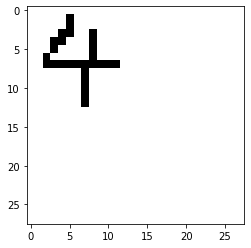

In [ ]:
gray_img = plimg.open('/content/img4.png').convert('L')
plt.imshow(gray_img,cmap = 'gray')
plt.show()

In [ ]:
img_pix = np.array(gray_img)
img_pix

In [ ]:
# 255 > 0
# 0 > 255
img_pix = 255-img_pix
img_pix

In [ ]:
img_pix = img_pix.astype('float32') / 255
img_pix = img_pix.reshape((1, 28,28,1))

In [ ]:
model2.predict(img_pix)

array([[1.4486059e-08, 1.5622356e-07, 3.7477305e-03, 9.7848183e-01,
        9.9576560e-08, 1.5751283e-07, 2.5408640e-09, 1.7769964e-02,
        1.0755048e-08, 6.0191013e-10]], dtype=float32)